In [169]:
# check if these degree day factors make sense 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [183]:
path = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/4landcover/'
hydro = pd.read_csv(path + 'langtang_climate_cut/20a/Hydro.out')#.set_index('D')

In [184]:
hydro

,D,Q,Qs,Qss,Vw,snow,snowacc,PET,AET,Pr,Ta,glacier_melt
0,1989-09-01 00:00:00,0.000000,0.0,0.000000,0.000000,0.0,0.0,3.492258,0.000000e+00,0.002813,4.833805,0.0
1,1989-09-01 01:00:00,0.000220,0.0,0.000220,0.008213,0.0,0.0,0.000402,9.408565e-07,0.008434,5.430545,0.0
2,1989-09-01 02:00:00,0.000252,0.0,0.000252,0.013145,0.0,0.0,0.112060,6.061807e-03,0.011247,6.415225,0.0
3,1989-09-01 03:00:00,0.000001,0.0,0.000001,0.011572,0.0,0.0,0.422372,1.563190e-02,0.014059,7.939084,0.0
4,1989-09-01 04:00:00,0.000002,0.0,0.000002,0.011483,0.0,0.0,0.885071,9.924856e-03,0.009838,8.769715,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
289987,2022-09-30 19:00:00,0.002364,0.0,0.002364,0.553074,0.0,0.0,3.915307,2.466758e-03,0.002477,2.283185,0.0
289988,2022-09-30 20:00:00,0.002354,0.0,0.002354,0.550720,0.0,0.0,3.891094,0.000000e+00,0.000000,2.093285,0.0
289989,2022-09-30 21:00:00,0.002344,0.0,0.002344,0.548387,0.0,0.0,3.877385,2.463074e-03,0.002474,1.985845,0.0
289990,2022-09-30 22:00:00,0.002334,0.0,0.002334,0.546054,0.0,0.0,3.864388,0.000000e+00,0.000000,1.884035,0.0


<AxesSubplot:>

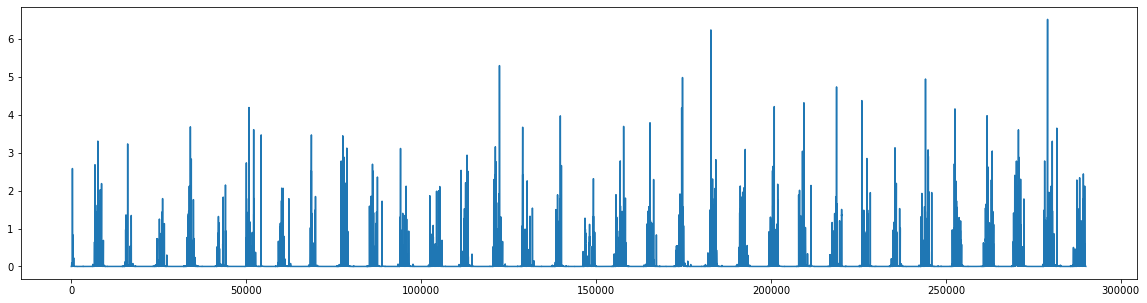

In [196]:
plt.figure(figsize = (20, 5))
# hydro.snow.plot()
hydro.Q.plot()

In [186]:
# count snow days

# hydro = hydro[hydro.snowacc > 0]
hydro['snowday_count'] = hydro['snow'].apply(lambda x: 1 if x > 0 else 0)



In [187]:
# hydro.snowday_count.plot()

In [188]:
# Define your custom function
def count_snow_hours(df):
    df['D'] = pd.to_datetime(df['D'])
    df['Year'] = df['D'].dt.year
    df = df.resample('D').mean()
    annual_sum = df.groupby('Year').sum()
    count = annual_sum.snowday_count.mean()
    return annual_sum

In [189]:
count = count_snow_days(hydro)


In [190]:
count['snowday_count_day'] = count.snowday_count

<AxesSubplot:>

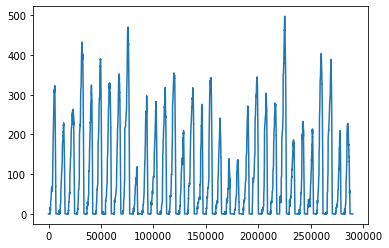

In [191]:
hydro.snow.plot()

In [192]:
# count.snowday_count_day
count


,Q,Qs,Qss,Vw,snow,snowacc,PET,AET,Pr,Ta,glacier_melt,snowday_count,snowday_count_day
Year,,,,,,,,,,,,,
1989,17.231169,9.651108,7.580061,1247.388938,5.022254e+04,65.264308,4901.261325,312.590690,395.094662,-5898.674594,0.0,1793,1793
1990,121.216018,77.726737,43.489281,7493.233486,7.724904e+05,-15.559950,15946.562612,2100.843527,2206.496809,-3483.535540,0.0,5870,5870
1991,59.513086,32.499497,27.013590,5052.637520,6.398964e+05,59.841322,16401.343344,1786.100109,1905.483579,-7974.800380,0.0,5753,5753
1992,62.329269,35.939413,26.389856,4555.380356,8.977426e+05,-29.001555,16070.893536,1706.810642,1740.116857,-11637.568062,0.0,6234,6234
1993,124.160103,82.704366,41.455737,6726.057035,1.337625e+06,-34.786558,15532.336367,2059.666593,2149.049218,-3967.166070,0.0,6284,6284
1994,67.256386,38.848192,28.408194,4681.973464,8.709314e+05,25.306544,16319.361665,1898.806873,1991.366638,-8723.644550,0.0,6015,6015
1995,267.860235,197.007635,70.852600,18507.838172,1.061506e+06,-3.471746,16390.971456,2025.554574,2291.164827,-8844.988540,0.0,5673,5673
1996,103.863000,63.559161,40.303839,8307.949734,1.029301e+06,-14.997401,15563.341516,1998.045037,2085.673783,-7419.591162,0.0,6222,6222
1997,124.924599,82.991694,41.932905,7542.373288,1.146207e+06,166.207194,14961.284329,1766.137440,2057.268480,-18807.302550,0.0,6683,6683


In [193]:
len(hydro)

289992

In [194]:
np.count_nonzero(hydro.snow)

194622